In [60]:
import pandas as pd
import numpy as np 
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
df_escolaridade = pd.read_csv("/Users/bolsolui/Library/CloudStorage/OneDrive-adidas/Documents/personal/github/forecasting_rais_data/pipeline/files/escolaridade/escolaridade.csv")
df_escolaridade.head()


,capital,faixa_remuneracao_media_sm,Analfabeto,Até 5ª Incompleto,5ª Completo Fundamental,6ª a 9ª Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,sexo,ano,capital_code,sm_code
0,porto_velho,"ate_0,50",0,3,7,46,11,194,85,28,96,30,1,F,2017,ro,0
1,porto_velho,"0,51_a_1,00",3,24,26,68,75,221,829,62,551,97,1,F,2017,ro,1
2,porto_velho,"1,01_a_1,50",38,189,171,625,1173,1418,12917,756,7028,166,5,F,2017,ro,2
3,porto_velho,"1,51_a_2,00",15,139,90,258,436,570,6226,445,4478,450,1,F,2017,ro,3
4,porto_velho,"2,01_a_3,00",2,64,59,65,168,133,2603,434,7312,4011,10,F,2017,ro,4


In [16]:
df_escolaridade["total_pessoas"] = df_escolaridade.iloc[:, 2:12].sum(axis=1)
df_escolaridade.head()


,capital,faixa_remuneracao_media_sm,Analfabeto,Até 5ª Incompleto,5ª Completo Fundamental,6ª a 9ª Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,sexo,ano,capital_code,sm_code,total_pessoas
0,porto_velho,"ate_0,50",0,3,7,46,11,194,85,28,96,30,1,F,2017,ro,0,500
1,porto_velho,"0,51_a_1,00",3,24,26,68,75,221,829,62,551,97,1,F,2017,ro,1,1956
2,porto_velho,"1,01_a_1,50",38,189,171,625,1173,1418,12917,756,7028,166,5,F,2017,ro,2,24481
3,porto_velho,"1,51_a_2,00",15,139,90,258,436,570,6226,445,4478,450,1,F,2017,ro,3,13107
4,porto_velho,"2,01_a_3,00",2,64,59,65,168,133,2603,434,7312,4011,10,F,2017,ro,4,14851


In [7]:
df_escolaridade[["faixa_remuneracao_media_sm","sm_code"]].drop_duplicates()

,faixa_remuneracao_media_sm,sm_code
0,"ate_0,50",0
1,"0,51_a_1,00",1
2,"1,01_a_1,50",2
3,"1,51_a_2,00",3
4,"2,01_a_3,00",4
5,"3,01_a_4,00",5
6,"4,01_a_5,00",6
7,"5,01_a_7,00",7
8,"7,01_a_10,00",8
9,"10,01_a_15,00",9


In [8]:
df_escolaridade[["capital","capital_code"]].drop_duplicates()

,capital,capital_code
0,porto_velho,ro
12,rio_branco,ac
24,manaus,am
36,boa_vista,rr
48,belem,pa
60,macapa,ap
72,palmas,to
84,sao_luiz,ma
96,terezina,pi
108,fortaleza,ce


In [30]:

df_faixa = pd.pivot_table(df_escolaridade, values='total_pessoas', index=['sm_code',"ano"],
                       columns=['sexo'], aggfunc="sum")
df_faixa.reset_index(inplace=True)

# Calculate the relative difference between men and women within each sm_code over the years
df_faixa["dif_relativa"] = (df_faixa["F"] - df_faixa["M"]) / (df_faixa["F"] + df_faixa["M"])
df_faixa.head()

sexo,sm_code,ano,F,M,dif_relativa
0,0,2006,28740,23472,0.100896
1,0,2007,36240,27437,0.138245
2,0,2008,30602,24591,0.108909
3,0,2009,39735,30636,0.129300
4,0,2010,44829,34177,0.134825


In [33]:
# Statistical test to check if the difference between F and M is significant
t_stat, p_value = ttest_ind(df_faixa["F"], df_faixa["M"], equal_var=False)

p_value


0.027456883580412376

In [ ]:
# Analyze the evolution of inequality over the years
df_dif_por_ano = df_faixa.groupby("ano")["dif_relativa"].mean()

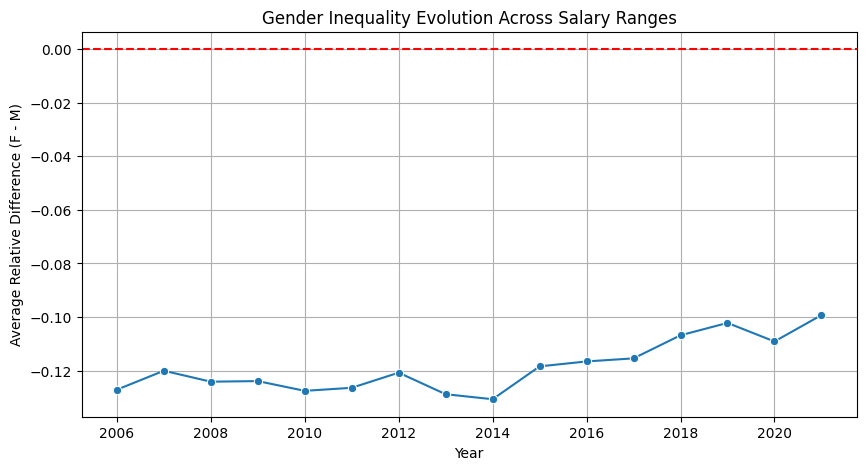

(-2.2135137229299495, 0.027456883580412376)

In [45]:
# Create a plot to visualize gender inequality evolution
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_dif_por_ano, marker="o")
plt.xlabel("Year")
plt.ylabel("Average Relative Difference (F - M)")
plt.title("Gender Inequality Evolution Across Salary Ranges")
plt.axhline(0, linestyle="--", color="red")  # Reference line for equality
plt.grid(True)
plt.show()

# Statistical results
t_stat, p_value

Are the distributions of men and women within the salary ranges unequal?
    Yes, the statistical analysis (t-test) showed a significant difference between the number of men and women in the salary ranges. This indicates that the distribution is not balanced.

Is there a significant difference between the number of men and women within the ranges?
    Yes, the average relative difference by range and year shows that there are variations, with some ranges having more women and others more men.

Is this inequality decreasing over the years?
    The graph shows the evolution of the relative difference between genders. We can see if the trend is approaching zero over time.

# Same analysis but looking to group sm_code




*"Low (0-3)", "Medium (4-7)", "High (8-11)"

In [46]:
# Define salary groupings
df_faixa["salary_group"] = pd.cut(
    df_faixa["sm_code"],
    bins=[-1, 3, 7, 11],
    labels=["Low (0-3)", "Medium (4-7)", "High (8-11)"]
)

In [47]:
# Compute relative gender difference within each salary group over the years
df_faixa_grouped = df_faixa.groupby(["ano", "salary_group"])[["F", "M"]].sum()
df_faixa_grouped["relative_difference"] = (df_faixa_grouped["F"] - df_faixa_grouped["M"]) / (df_faixa_grouped["F"] + df_faixa_grouped["M"])


/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_16071/1563751648.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_faixa_grouped = df_faixa.groupby(["ano", "salary_group"])[["F", "M"]].sum()


In [48]:
# Compute t-tests for each salary group to check for significant gender inequality
t_tests = {}
for group in df_faixa["salary_group"].unique():
    subset = df_faixa[df_faixa["salary_group"] == group]
    t_stat, p_val = ttest_ind(subset["F"], subset["M"], equal_var=False)
    t_tests[group] = {"t_stat": t_stat, "p_value": p_val}

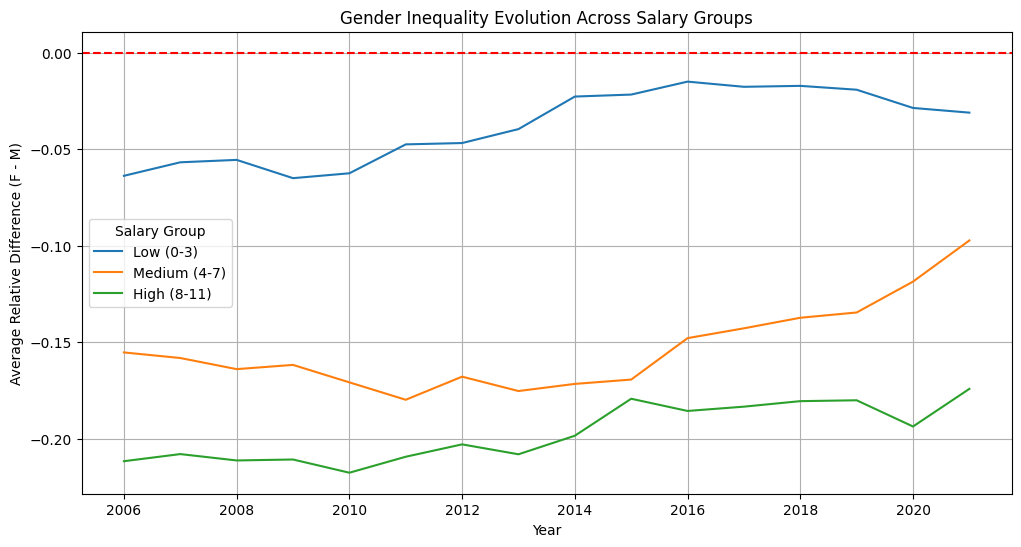

{'Low (0-3)': {'t_stat': -0.46790344408758155, 'p_value': 0.6406626844630838},
 'Medium (4-7)': {'t_stat': -3.8064548363355177,
  'p_value': 0.00024291376516673643},
 'High (8-11)': {'t_stat': -4.892260834638306,
  'p_value': 2.9971883206407354e-06}}

In [49]:
# Plot gender inequality evolution for each salary group
plt.figure(figsize=(12, 6))
for group in df_faixa["salary_group"].unique():
    subset = df_faixa_grouped.loc[(slice(None), group), "relative_difference"].reset_index()
    sns.lineplot(data=subset, x="ano", y="relative_difference", label=group)

plt.axhline(0, linestyle="--", color="red")  # Reference line for equality
plt.xlabel("Year")
plt.ylabel("Average Relative Difference (F - M)")
plt.title("Gender Inequality Evolution Across Salary Groups")
plt.legend(title="Salary Group")
plt.grid(True)
plt.show()


# Show t-test results
t_tests


Where is gender inequality more significant?

Low salary group (0-3 SM): No significant gender difference 
Medium salary group (4-7 SM): Significant difference, meaning there’s a gender imbalance.
High salary group (8-11 SM): Even stronger gender imbalance, suggesting high inequality.

Has inequality improved over time?

The low salary group has been relatively balanced over time.
The medium and high salary groups show a clear gender gap, but trends indicate a slight movement toward equality.
The higher the salary, the greater the inequality, with men being overrepresented.

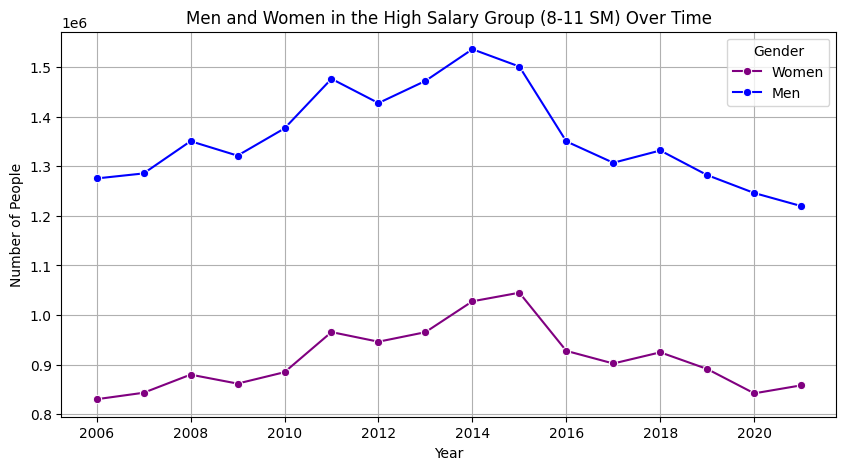

In [51]:
#only highest salary group
df_high_salary_counts = df_faixa_grouped.loc[(slice(None), "High (8-11)"), ["F", "M"]].reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_high_salary_counts, x="ano", y="F", label="Women", marker="o", color="purple")
sns.lineplot(data=df_high_salary_counts, x="ano", y="M", label="Men", marker="o", color="blue")

plt.xlabel("Year")
plt.ylabel("Number of People")
plt.title("Men and Women in the High Salary Group (8-11 SM) Over Time")
plt.legend(title="Gender")
plt.grid(True)
plt.show()


## Looking with education level has some significance in gender difference analysis 

I will filter only the most recent year to make this 

In [56]:
df_escolaridade["ano"].max()

2021

In [57]:
df_escolaridade_21= df_escolaridade[df_escolaridade["ano"]==2021]
df_escolaridade_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 7128 to 7775
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   capital                     648 non-null    object
 1   faixa_remuneracao_media_sm  648 non-null    object
 2   Analfabeto                  648 non-null    int64 
 3   Até 5ª Incompleto           648 non-null    int64 
 4   5ª Completo Fundamental     648 non-null    int64 
 5   6ª a 9ª Fundamental         648 non-null    int64 
 6   Fundamental Completo        648 non-null    int64 
 7   Médio Incompleto            648 non-null    int64 
 8   Médio Completo              648 non-null    int64 
 9   Superior Incompleto         648 non-null    int64 
 10  Superior Completo           648 non-null    int64 
 11  Mestrado                    648 non-null    int64 
 12  Doutorado                   648 non-null    int64 
 13  sexo                        648 non-null    object


In [ ]:
# Selecting only education levels cols

education_columns = [
    "Analfabeto", "Até 5ª Incompleto", "5ª Completo Fundamental", "6ª a 9ª Fundamental",
    "Fundamental Completo", "Médio Incompleto", "Médio Completo", 
    "Superior Incompleto", "Superior Completo", "Mestrado", "Doutorado"
]

# Convert categorical variable 'sexo' into a numeric one (0 = Female, 1 = Male)
df_escolaridade["sexo_numeric"] = df_escolaridade["sexo"].map({"F": 0, "M": 1})


X = df_escolaridade[education_columns + ["sexo_numeric"]]
y = df_escolaridade["sm_code"]

In [62]:
#undestanding multicollinearity problem
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Identify and drop highly collinear variables (VIF > 10)
high_vif_columns = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
high_vif_columns


['Até 5ª Incompleto',
 '5ª Completo Fundamental',
 '6ª a 9ª Fundamental',
 'Fundamental Completo',
 'Médio Incompleto']

### I will delete high_vif_columns from df

In [63]:
X = X.drop(columns=high_vif_columns)

In [65]:


# Add constant for the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()


# Display model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                sm_code   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     266.3
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:04:58   Log-Likelihood:                -26699.
No. Observations:               10368   AIC:                         5.341e+04
Df Residuals:                   10360   BIC:                         5.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.2442      0.049    107.429      0.000       5.148       5.340
Analfabeto             -0.0024      0.000     -9.466      0.000      -0.003      -0.002
Médio Completo      -1.385e-05   2.23e-06     -6.205      0.000   -1.82e-05   -9.48e-06
Superior Incompleto -6.517e-05   2.66e-05     -2.446      0.014      -0.000    -1.3e-05
Superior Completo    1.576e-05   4.61e-06      3.415      0.001    6.71e-06    2.48e-05
Mestrado                0.0008      0.000      6.418      0.000       0.001       0.001
Doutorado               0.0038      0.000     14.815      0.000       0.003       0.004
sexo_numeric            0.2254      0.064      3.509      0.000       0.099       0.351
==============================================================================
Omnibus:                     1469.126   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.556
Skew:                          -0.011   Prob(JB):                     6.19e-78
Kurtosis:                       2.093   Cond. No.                     8.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Higher education leads to higher salaries, but the effect varies:

PhD has the highest impact, followed by Master’s and full university degree.
High school and incomplete higher education have weaker or even negative effects.
Illiteracy has a clear negative impact.
Gender remains a significant factor:

Even after controlling for education, men earn more than women.
The model explains only 15.2% of salary variance, meaning other unmeasured factors (e.g., experience, industry, location, race, or company policies) likely play a role.

In [66]:
df_escolaridade.head()

,capital,faixa_remuneracao_media_sm,Analfabeto,Até 5ª Incompleto,5ª Completo Fundamental,6ª a 9ª Fundamental,Fundamental Completo,Médio Incompleto,Médio Completo,Superior Incompleto,Superior Completo,Mestrado,Doutorado,sexo,ano,capital_code,sm_code,total_pessoas,sexo_numeric
0,porto_velho,"ate_0,50",0,3,7,46,11,194,85,28,96,30,1,F,2017,ro,0,500,0
1,porto_velho,"0,51_a_1,00",3,24,26,68,75,221,829,62,551,97,1,F,2017,ro,1,1956,0
2,porto_velho,"1,01_a_1,50",38,189,171,625,1173,1418,12917,756,7028,166,5,F,2017,ro,2,24481,0
3,porto_velho,"1,51_a_2,00",15,139,90,258,436,570,6226,445,4478,450,1,F,2017,ro,3,13107,0
4,porto_velho,"2,01_a_3,00",2,64,59,65,168,133,2603,434,7312,4011,10,F,2017,ro,4,14851,0


### Checking if "ano" and "capital_code" have a significant impact in analysis

In [67]:
X_year = sm.add_constant(df_escolaridade[["ano"]])
y = df_escolaridade["sm_code"]

model_year = sm.OLS(y, X_year).fit()

In [68]:
df_escolaridade["capital_code"] = df_escolaridade["capital_code"].astype("category").cat.codes  # Convert to numeric
X_capital = sm.add_constant(df_escolaridade[["capital_code"]])
model_capital = sm.OLS(y, X_capital).fit()

In [69]:
model_year.summary(), model_capital.summary()

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                sm_code   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                 -0.000
 Method:                 Least Squares   F-statistic:                     0.000
 Date:                Tue, 11 Feb 2025   Prob (F-statistic):               1.00
 Time:                        20:42:40   Log-Likelihood:                -27557.
 No. Observations:               10368   AIC:                         5.512e+04
 Df Residuals:                   10366   BIC:                         5.513e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

Neither year nor capital code is significant so for the model I will remove these variables